**All Time Premier League Player Statistics**

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('dataset - 2020-09-24.csv')

In [206]:
df

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,...,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

Из большого числа фичей оставим только общее о играках, не вдаваясь в подробности о их статистике

In [234]:
df_modified = df[['Name',
                  'Jersey Number',
                  'Club',
                  'Position',
                  'Nationality',
                  'Age',
                  'Appearances',
                  'Wins',
                  'Losses',
                  'Goals',
                  'Assists',
                  'Passes',
                  'Passes per match',
                  'Yellow cards',
                  'Red cards',
                  'Fouls']]

In [77]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              571 non-null    object 
 1   Jersey Number     563 non-null    float64
 2   Club              571 non-null    object 
 3   Position          571 non-null    object 
 4   Nationality       570 non-null    object 
 5   Age               570 non-null    float64
 6   Appearances       571 non-null    int64  
 7   Wins              571 non-null    int64  
 8   Losses            571 non-null    int64  
 9   Goals             571 non-null    int64  
 10  Assists           571 non-null    int64  
 11  Passes            571 non-null    int64  
 12  Passes per match  571 non-null    float64
 13  Yellow cards      571 non-null    int64  
 14  Red cards         571 non-null    int64  
 15  Fouls             571 non-null    int64  
dtypes: float64(3), int64(9), object(4)
memory us

In [208]:
df_modified.isnull().sum()

Name                0
Jersey Number       8
Club                0
Position            0
Nationality         1
Age                 1
Appearances         0
Wins                0
Losses              0
Goals               0
Assists             0
Passes              0
Passes per match    0
Yellow cards        0
Red cards           0
Fouls               0
dtype: int64

In [235]:
df_modified = df_modified.dropna(subset=['Jersey Number','Age'])

array([[<Axes: title={'center': 'Jersey Number'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Appearances'}>],
       [<Axes: title={'center': 'Wins'}>,
        <Axes: title={'center': 'Losses'}>,
        <Axes: title={'center': 'Goals'}>],
       [<Axes: title={'center': 'Assists'}>,
        <Axes: title={'center': 'Passes'}>,
        <Axes: title={'center': 'Passes per match'}>],
       [<Axes: title={'center': 'Yellow cards'}>,
        <Axes: title={'center': 'Red cards'}>,
        <Axes: title={'center': 'Fouls'}>]], dtype=object)

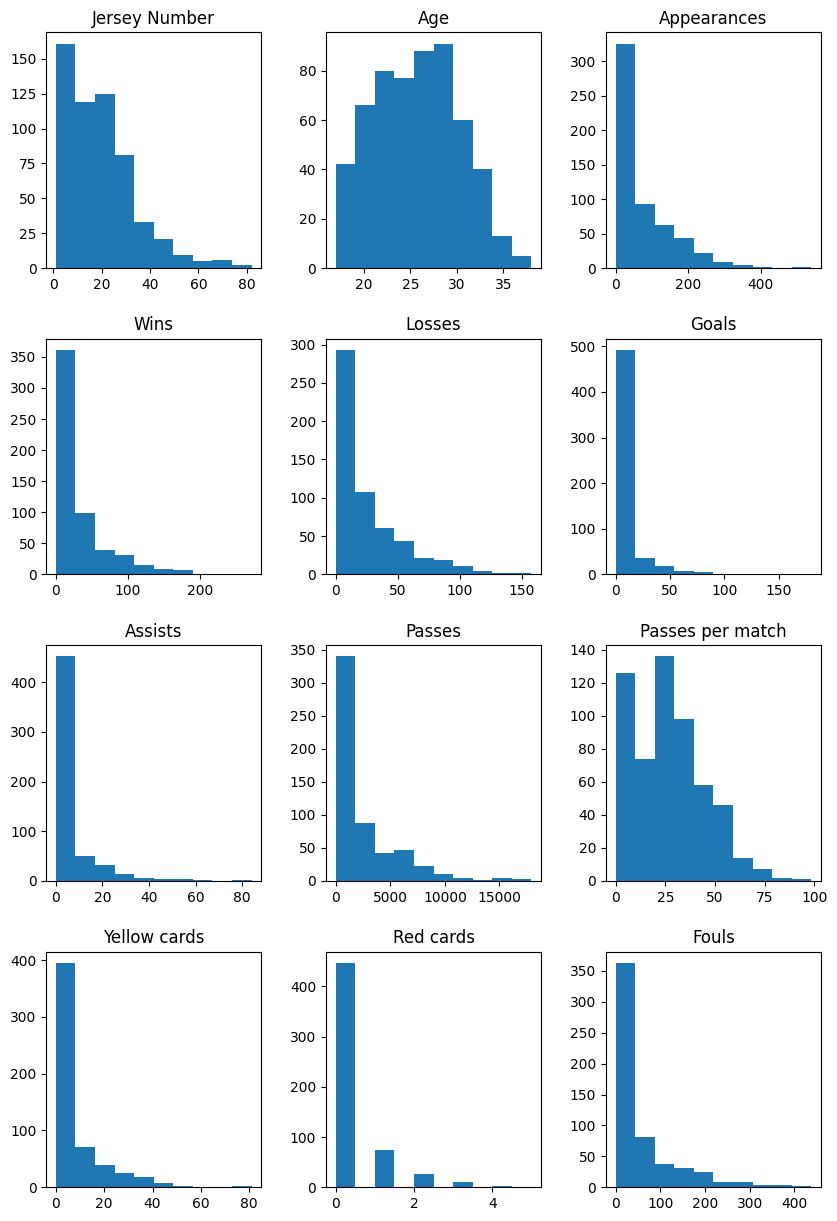

In [198]:
df_modified.hist(figsize=(10,15), grid=False)

<ipython-input-226-944ff0df6c18>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_modified, x = 'Club', palette='plasma', order = class_order)


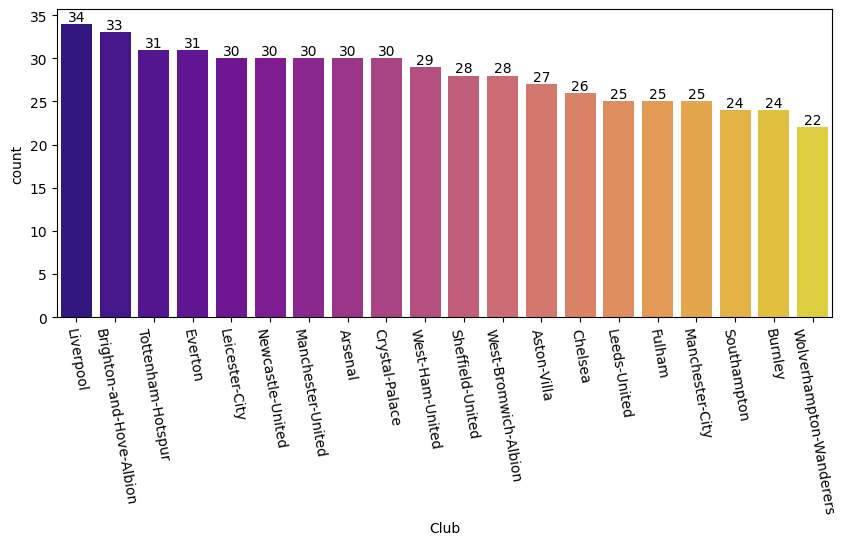

In [226]:
class_order = df_modified['Club'].value_counts().index
fig, ax = plt.subplots(figsize = (10,4))
sns.countplot(data = df_modified, x = 'Club', palette='plasma', order = class_order)
cnt = df_modified.Club.nunique()
for i in range(cnt):
  ax.bar_label(ax.containers[i])

plt.xticks(rotation = -80)
plt.show()

<ipython-input-50-46ecd25de131>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_modified, x = 'Position', palette='viridis', order = class_order)


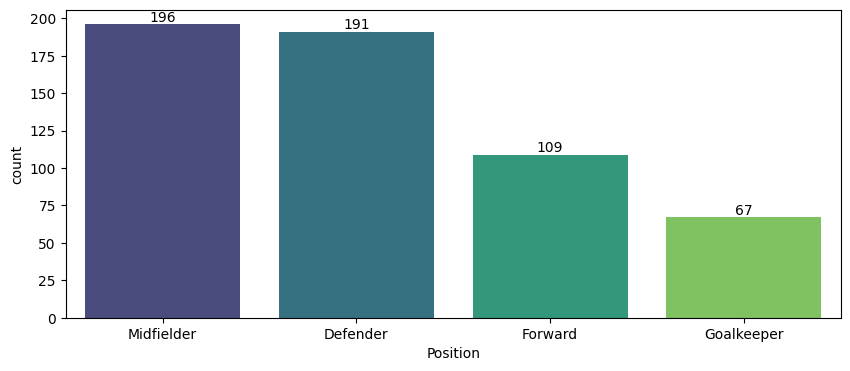

In [50]:
class_order = df_modified['Position'].value_counts().index
fig, ax = plt.subplots(figsize = (10,4))
sns.countplot(data = df_modified, x = 'Position', palette='viridis', order = class_order)
cnt = df_modified.Position.nunique()
for i in range(cnt):
  ax.bar_label(ax.containers[i])


plt.show()

<ipython-input-218-54ae10175db6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =  df_modified['Club'], y =  df_modified['Goals'],palette = 'coolwarm')


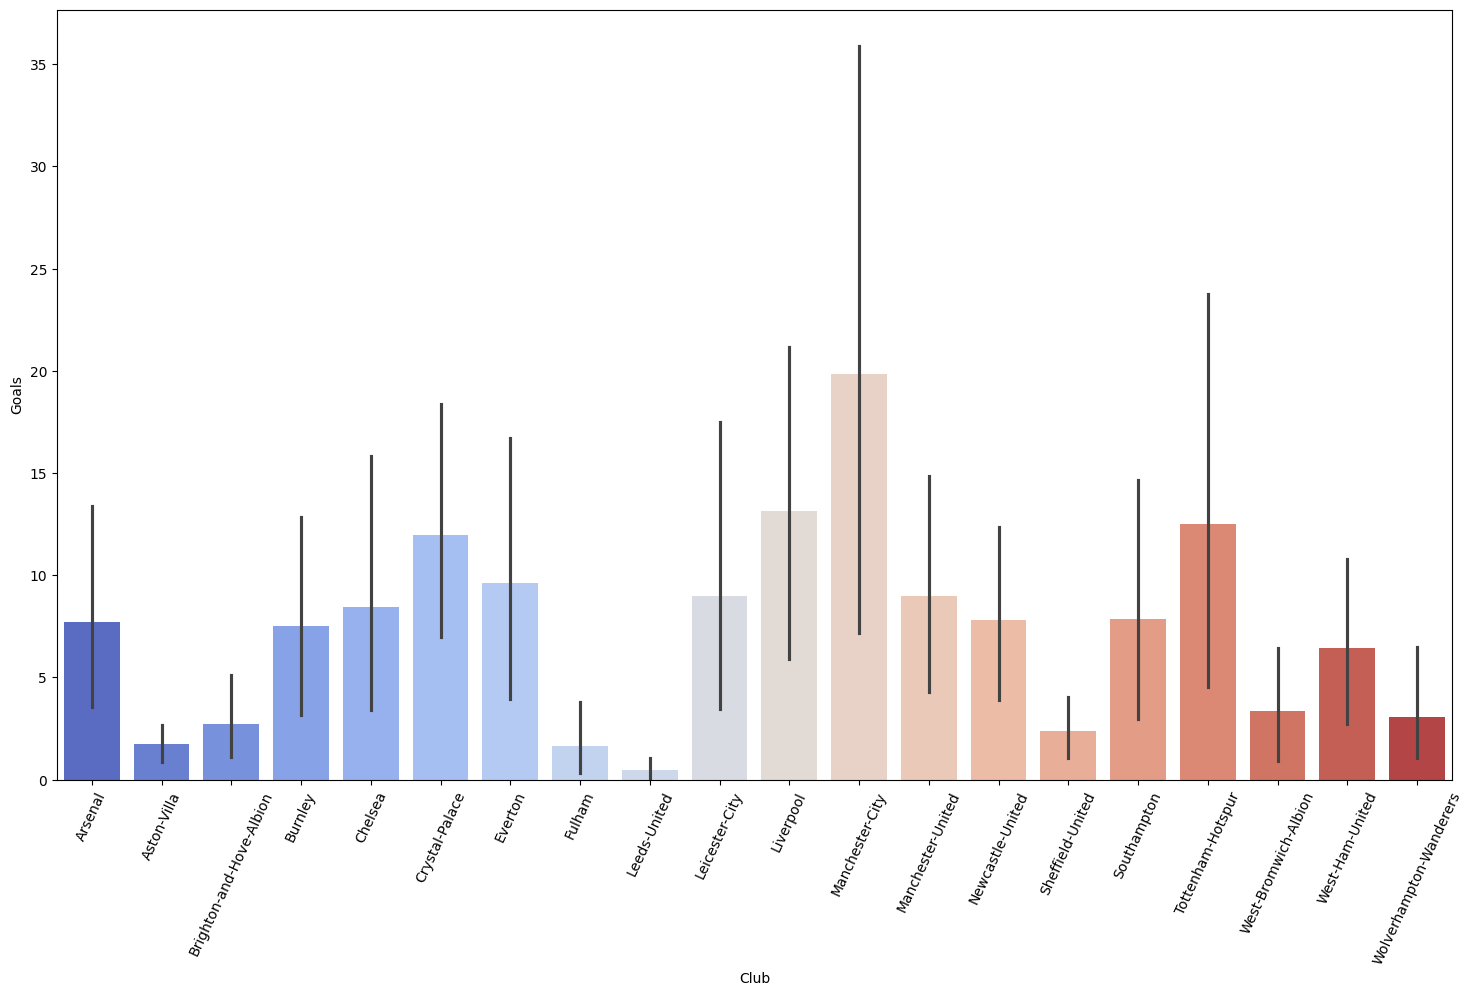

In [218]:
plt.figure(figsize=(18,10))
sns.barplot(x =  df_modified['Club'], y =  df_modified['Goals'],palette = 'coolwarm')
plt.xlabel('Club')
plt.ylabel('Goals')
plt.xticks(rotation = 65)
plt.show()


<ipython-input-63-23688cb51f54>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_modified['Club'], y = df_modified['Yellow cards'],palette = 'YlOrRd')
<ipython-input-63-23688cb51f54>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_modified['Club'], y = df_modified['Red cards'],palette = 'Reds')
<ipython-input-63-23688cb51f54>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_modified['Club'], y = df_modified['Fouls'],palette = 'RdPu')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Arsenal'),
  Text(1, 0, 'Aston-Villa'),
  Text(2, 0, 'Brighton-and-Hove-Albion'),
  Text(3, 0, 'Burnley'),
  Text(4, 0, 'Chelsea'),
  Text(5, 0, 'Crystal-Palace'),
  Text(6, 0, 'Everton'),
  Text(7, 0, 'Fulham'),
  Text(8, 0, 'Leeds-United'),
  Text(9, 0, 'Leicester-City'),
  Text(10, 0, 'Liverpool'),
  Text(11, 0, 'Manchester-City'),
  Text(12, 0, 'Manchester-United'),
  Text(13, 0, 'Newcastle-United'),
  Text(14, 0, 'Sheffield-United'),
  Text(15, 0, 'Southampton'),
  Text(16, 0, 'Tottenham-Hotspur'),
  Text(17, 0, 'West-Bromwich-Albion'),
  Text(18, 0, 'West-Ham-United'),
  Text(19, 0, 'Wolverhampton-Wanderers')])

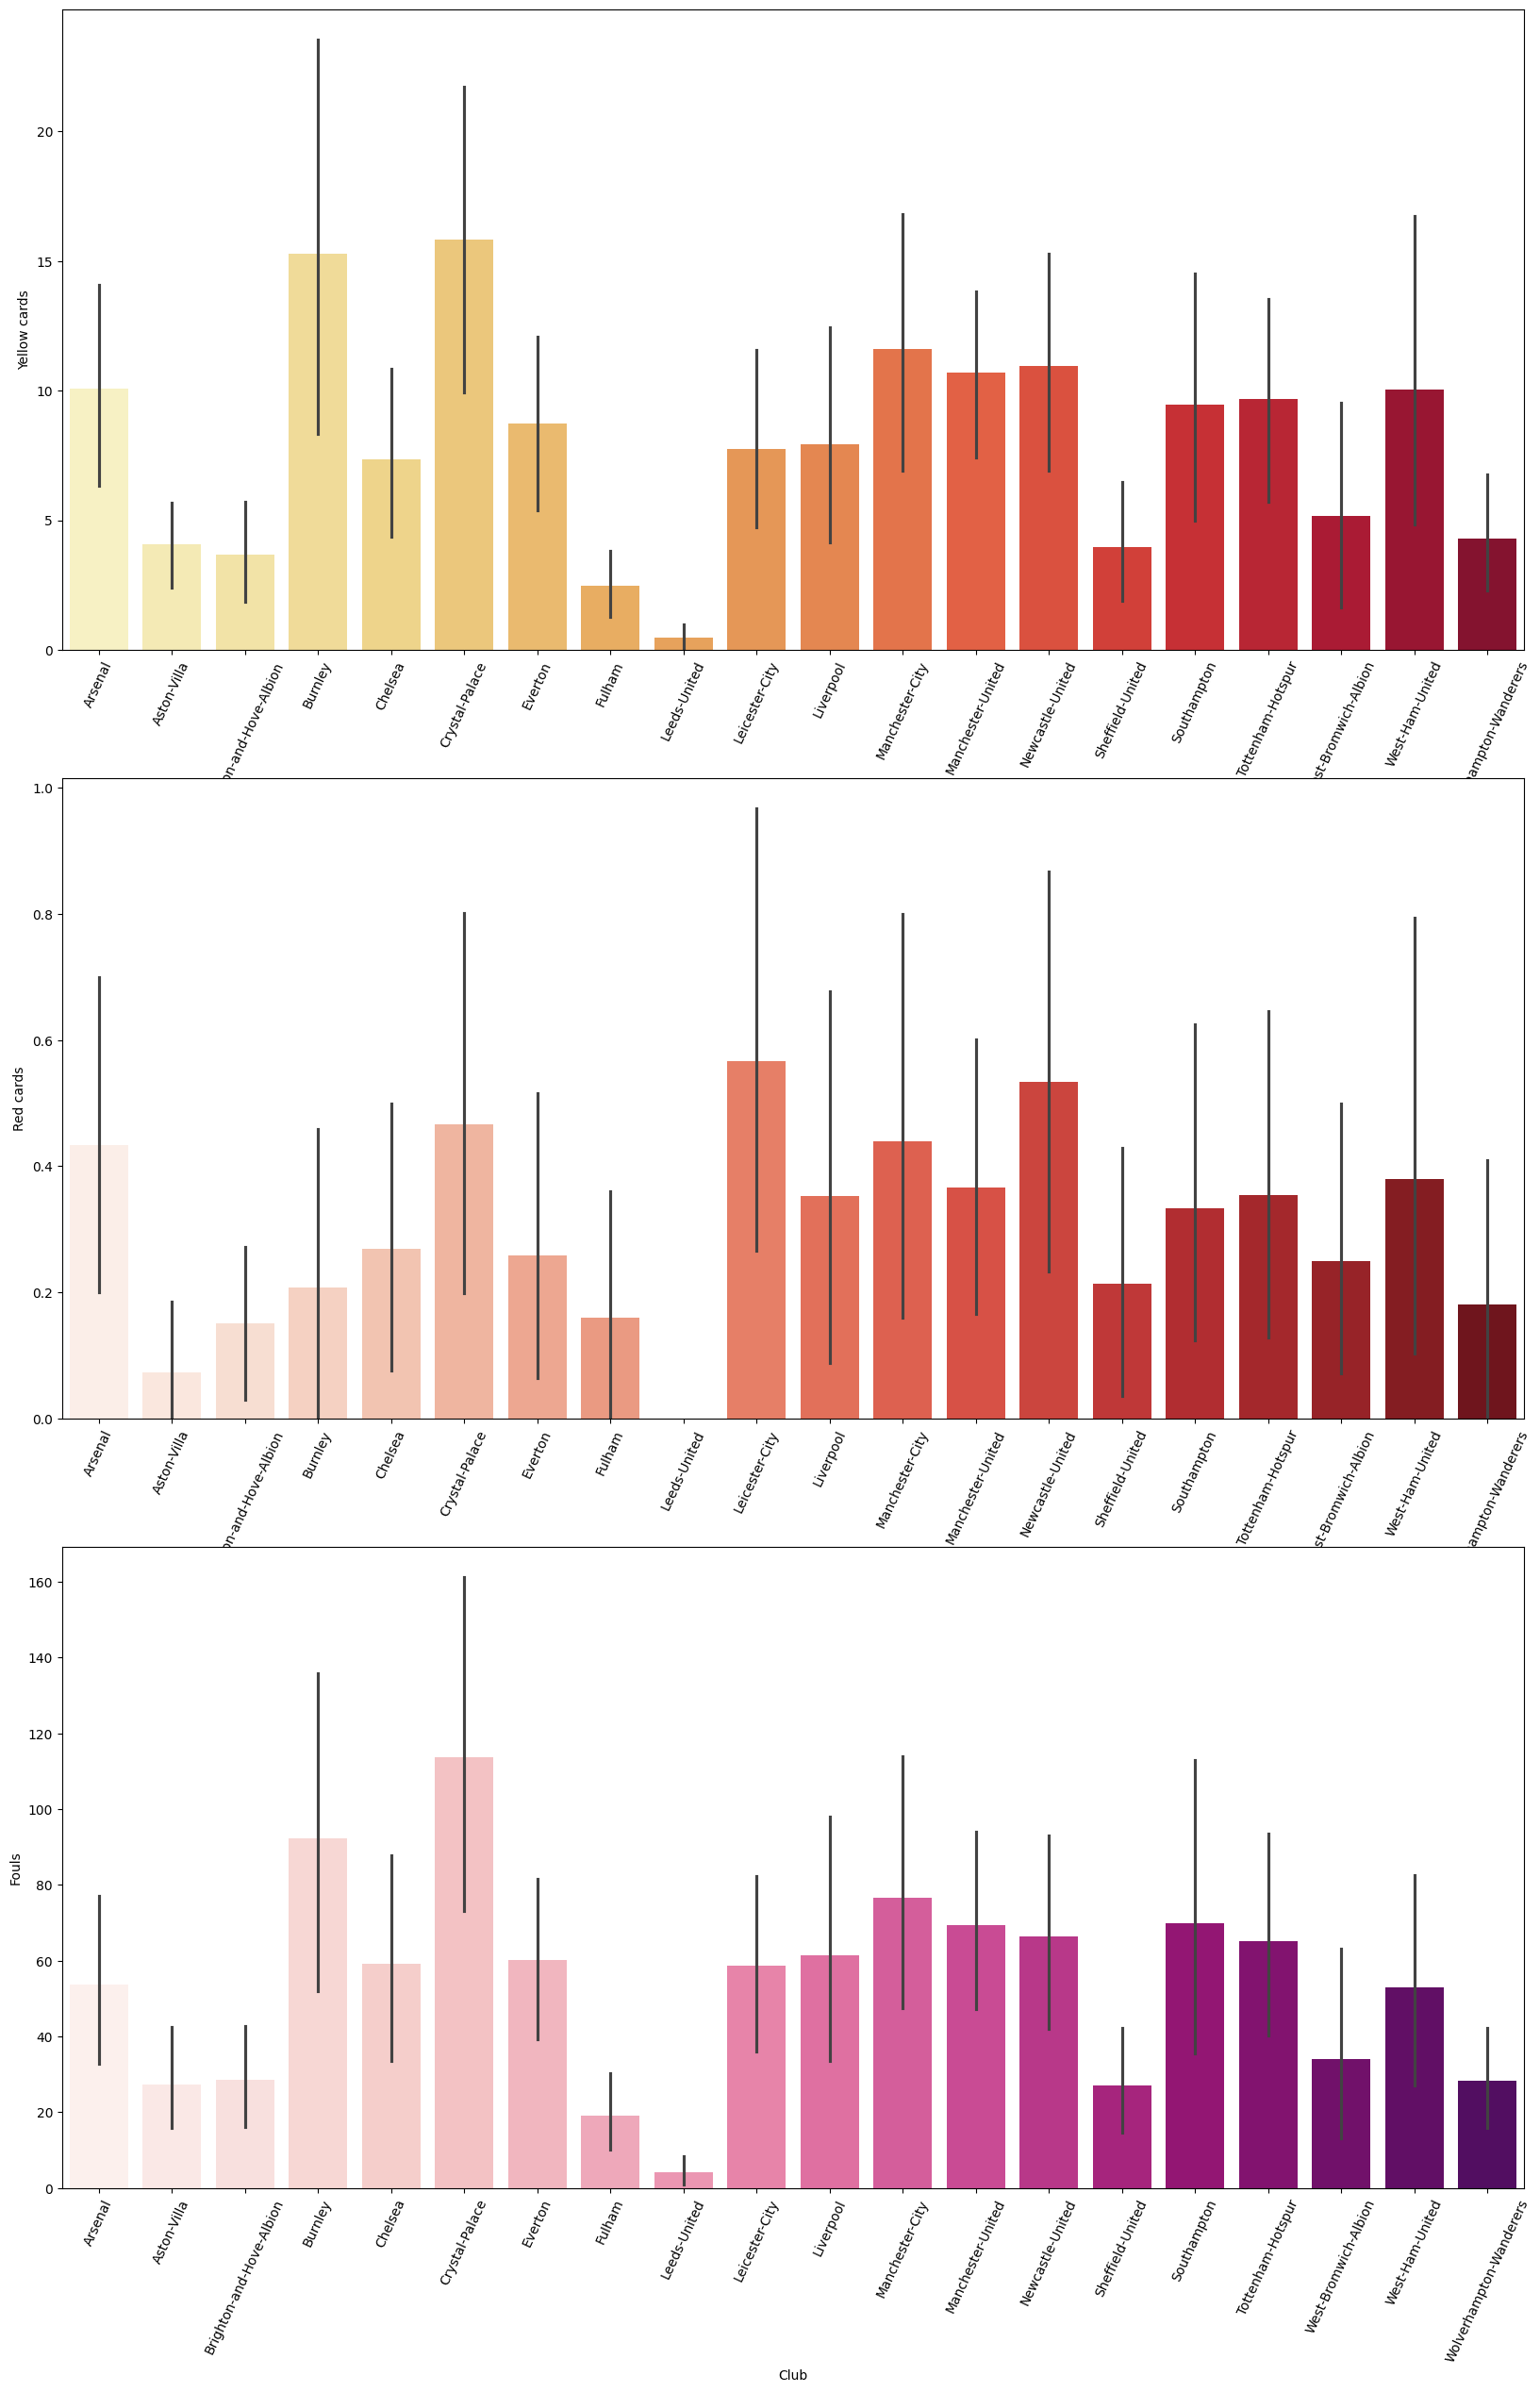

In [63]:
plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
sns.barplot(x = df_modified['Club'], y = df_modified['Yellow cards'],palette = 'YlOrRd')
plt.xlabel('Club')
plt.ylabel('Yellow cards')
plt.xticks(rotation = 65)

plt.subplot(3,1,2)
sns.barplot(x = df_modified['Club'], y = df_modified['Red cards'],palette = 'Reds')
plt.xlabel('Club')
plt.ylabel('Red cards')
plt.xticks(rotation = 65)

plt.subplot(3,1,3)
sns.barplot(x = df_modified['Club'], y = df_modified['Fouls'],palette = 'RdPu')
plt.xlabel('Club')
plt.ylabel('Fouls')
plt.xticks(rotation = 65)

<ipython-input-219-651bc2254859>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_modified['Club'], y = df_modified['Wins'],palette = 'Greens')
<ipython-input-219-651bc2254859>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_modified['Club'], y = df_modified['Losses'],palette = 'Oranges')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Arsenal'),
  Text(1, 0, 'Aston-Villa'),
  Text(2, 0, 'Brighton-and-Hove-Albion'),
  Text(3, 0, 'Burnley'),
  Text(4, 0, 'Chelsea'),
  Text(5, 0, 'Crystal-Palace'),
  Text(6, 0, 'Everton'),
  Text(7, 0, 'Fulham'),
  Text(8, 0, 'Leeds-United'),
  Text(9, 0, 'Leicester-City'),
  Text(10, 0, 'Liverpool'),
  Text(11, 0, 'Manchester-City'),
  Text(12, 0, 'Manchester-United'),
  Text(13, 0, 'Newcastle-United'),
  Text(14, 0, 'Sheffield-United'),
  Text(15, 0, 'Southampton'),
  Text(16, 0, 'Tottenham-Hotspur'),
  Text(17, 0, 'West-Bromwich-Albion'),
  Text(18, 0, 'West-Ham-United'),
  Text(19, 0, 'Wolverhampton-Wanderers')])

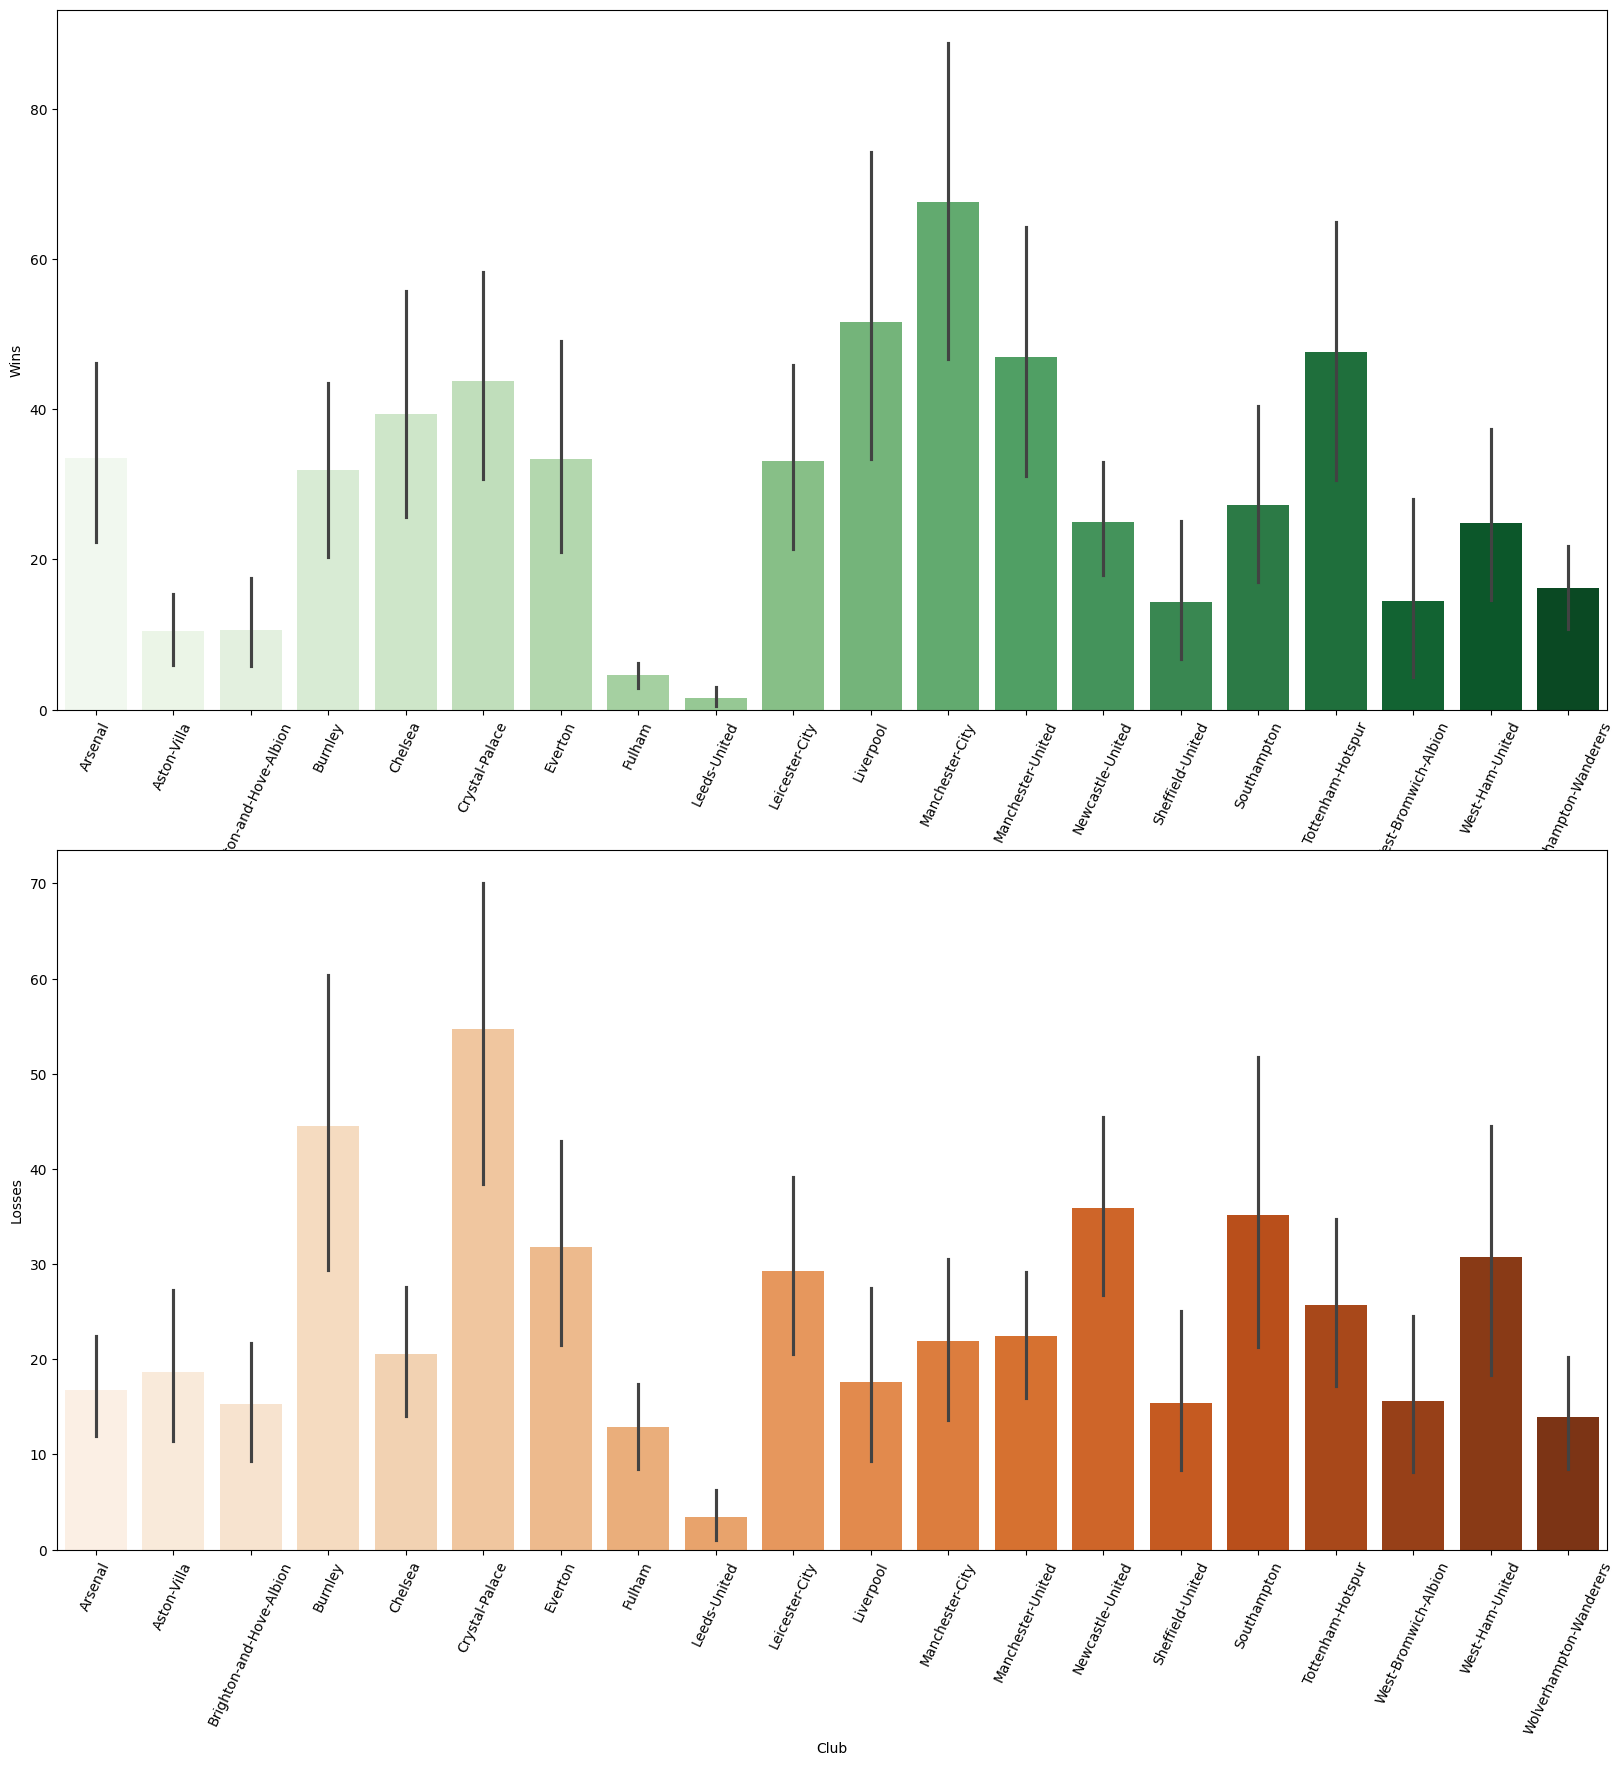

In [219]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.barplot(x = df_modified['Club'], y = df_modified['Wins'],palette = 'Greens')
plt.xlabel('Club')
plt.ylabel('Wins')
plt.xticks(rotation = 65)

plt.subplot(2,1,2)
sns.barplot(x = df_modified['Club'], y = df_modified['Losses'],palette = 'Oranges')
plt.xlabel('Club')
plt.ylabel('Losses')
plt.xticks(rotation = 65)

In [220]:
#перевод из категориалных в числове
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [236]:
X = df_modified.copy()

In [237]:
categorial_colomns = []
for col in X.columns:
  if X[col].dtypes == 'object':
    categorial_colomns.append(col)

for col in categorial_colomns:
  X.loc[:, col] = label_encoder.fit_transform(X[col])

In [238]:
df_modified['Club'].unique()

array(['Arsenal', 'Aston-Villa', 'Brighton-and-Hove-Albion', 'Burnley',
       'Chelsea', 'Crystal-Palace', 'Everton', 'Fulham', 'Leeds-United',
       'Leicester-City', 'Liverpool', 'Manchester-City',
       'Manchester-United', 'Newcastle-United', 'Sheffield-United',
       'Southampton', 'Tottenham-Hotspur', 'West-Bromwich-Albion',
       'West-Ham-United', 'Wolverhampton-Wanderers'], dtype=object)

In [84]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN

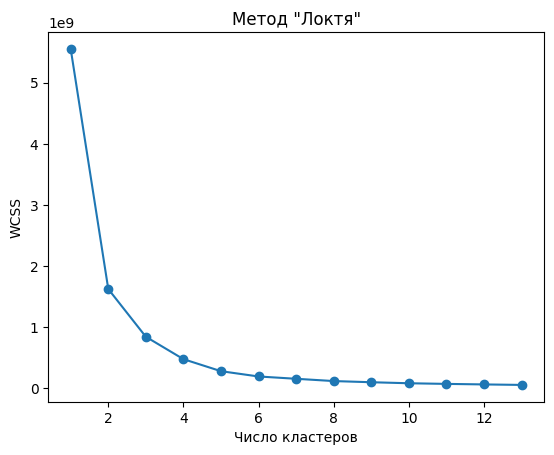

In [187]:
wcss = [] #сумма квадратов расстояний внутри кластера

for i in range(1, 14):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=13, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Визуализация результатов
plt.plot(range(1, 14), wcss, marker = 'o')
plt.title('Метод "Локтя"')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')
plt.show()

По методу к-средних мы можем выбрать 5-6 кластеров

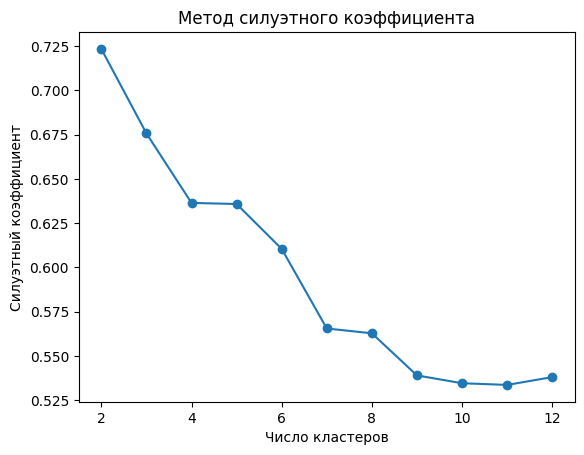

In [188]:
silhouette_coefficients = []

for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

# Визуализация результатов
plt.plot(range(2, 13), silhouette_coefficients, marker= 'o')
plt.title('Метод силуэтного коэффициента')
plt.xlabel('Число кластеров')
plt.ylabel('Силуэтный коэффициент')
plt.show()

Выбираем 5 кластеров

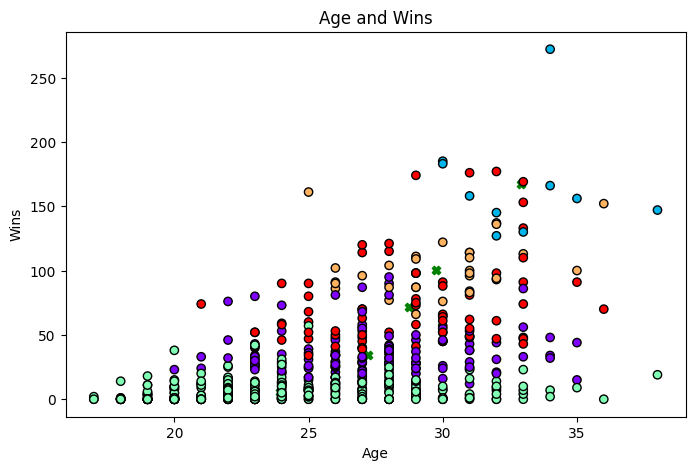

In [276]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
cluster = kmeans.cluster_centers_
centroids = np.array(cluster)
labels = kmeans.labels_

plt.figure(figsize = (8,5))
plt.scatter(centroids[:,5],centroids[:,7], marker = "X", color = 'g')
plt.scatter(x = 'Age',y = 'Wins',c = labels,cmap = 'rainbow',data = X,edgecolor = 'black');
plt.title('Age and Wins')
plt.xlabel('Age')
plt.ylabel('Wins')
plt.show();

In [240]:
df_modified['kmeans labels'] = kmeans_labels

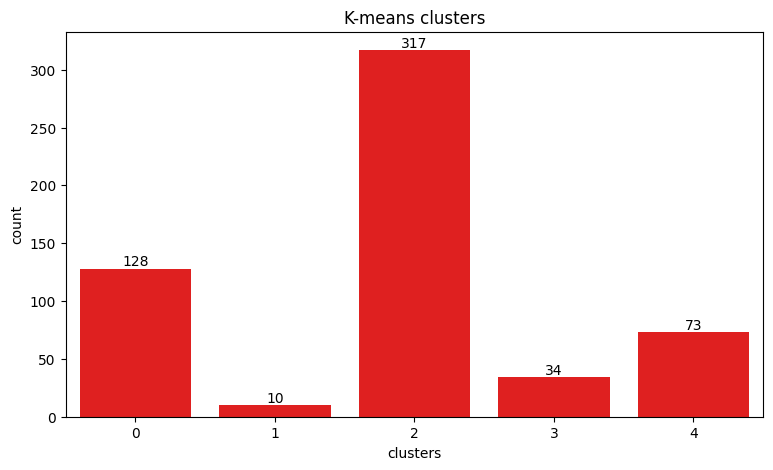

In [277]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(x=df_modified['kmeans labels'], color='r')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('K-means clusters')
plt.xlabel('clusters')
plt.show()

<ipython-input-262-7fa83c2f56f3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categories[col], palette='cividis')
<ipython-input-262-7fa83c2f56f3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categories[col], palette='cividis')
<ipython-input-262-7fa83c2f56f3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categories[col], palette='cividis')
<ipython-input-262-7fa83c2f56f3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set

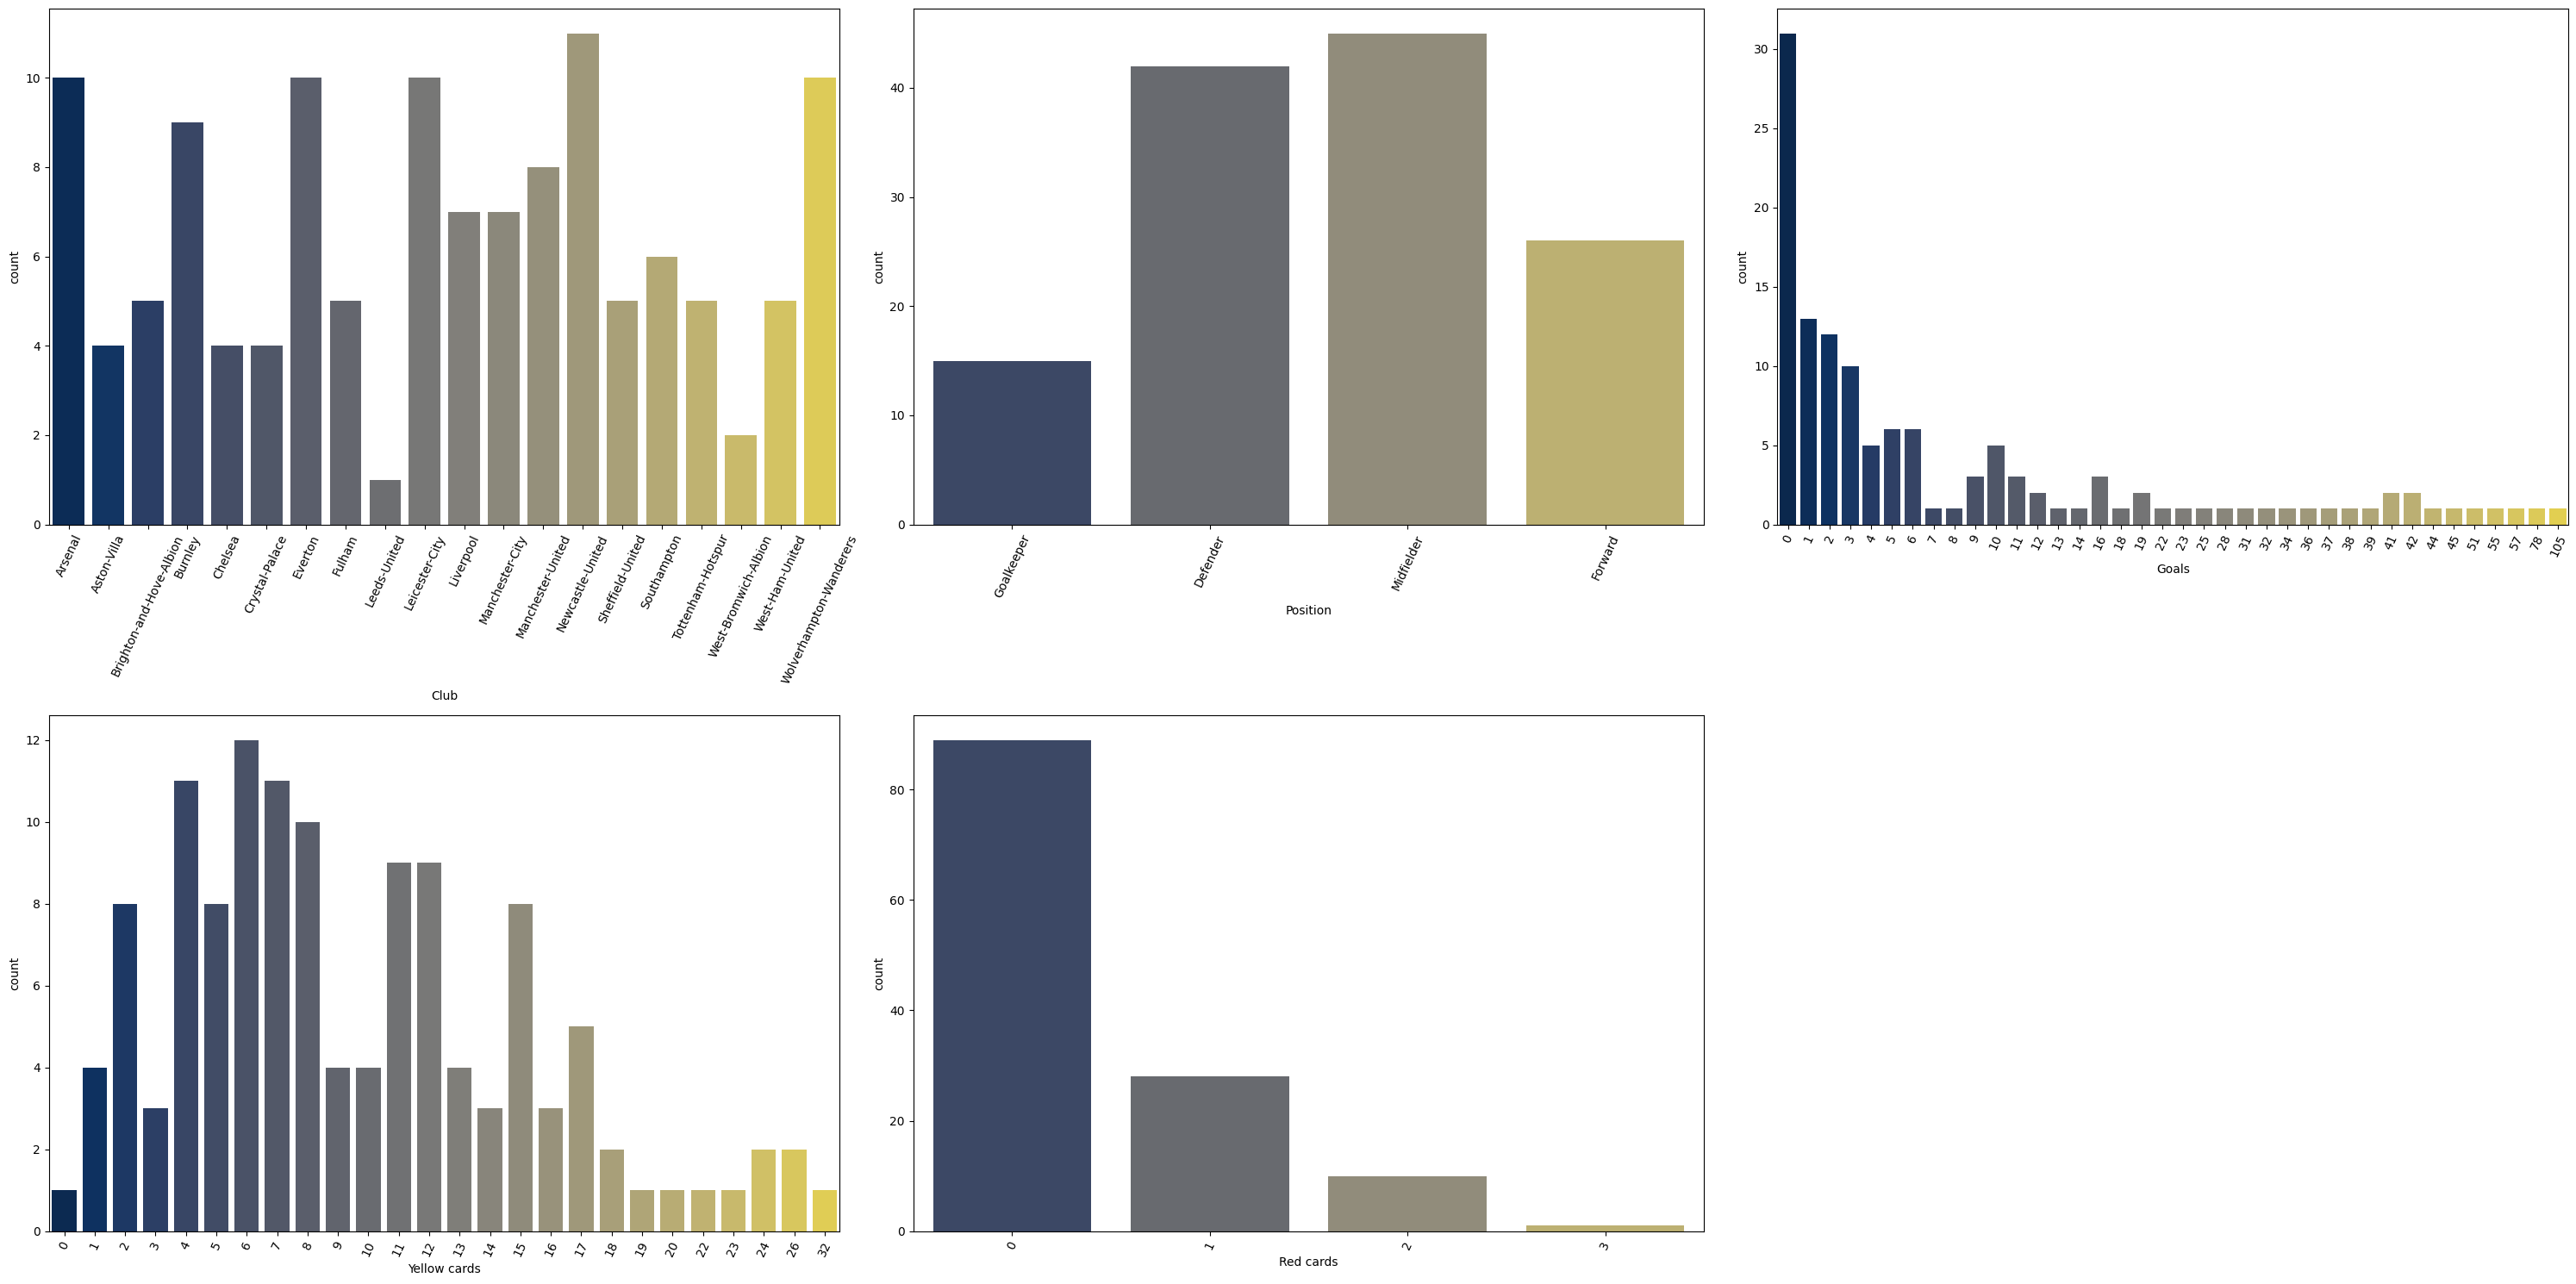

In [262]:
categories = df_modified[df_modified['kmeans labels'] == 0][[ 'Club','Position', 'Goals','Yellow cards','Red cards']]

plt.figure(figsize = (30, 15))
for i, col in enumerate(categories.columns, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x=categories[col], palette='cividis')
  plt.xticks(rotation = 65)
  plt.tight_layout()
plt.show()

<Axes: >

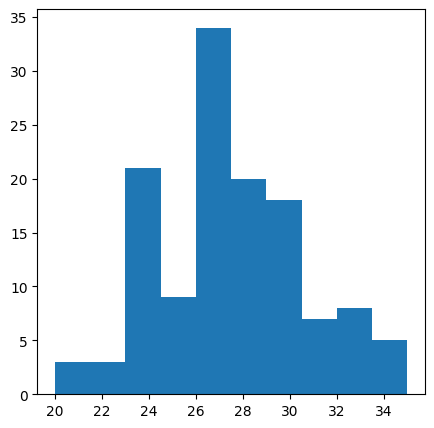

In [259]:
df_modified[df_modified['kmeans labels'] == 0]['Age'].hist(figsize=(5, 5), grid=False)

<ipython-input-264-2441601ff1af>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categories[col], palette='viridis')
<ipython-input-264-2441601ff1af>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categories[col], palette='viridis')
<ipython-input-264-2441601ff1af>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categories[col], palette='viridis')
<ipython-input-264-2441601ff1af>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set

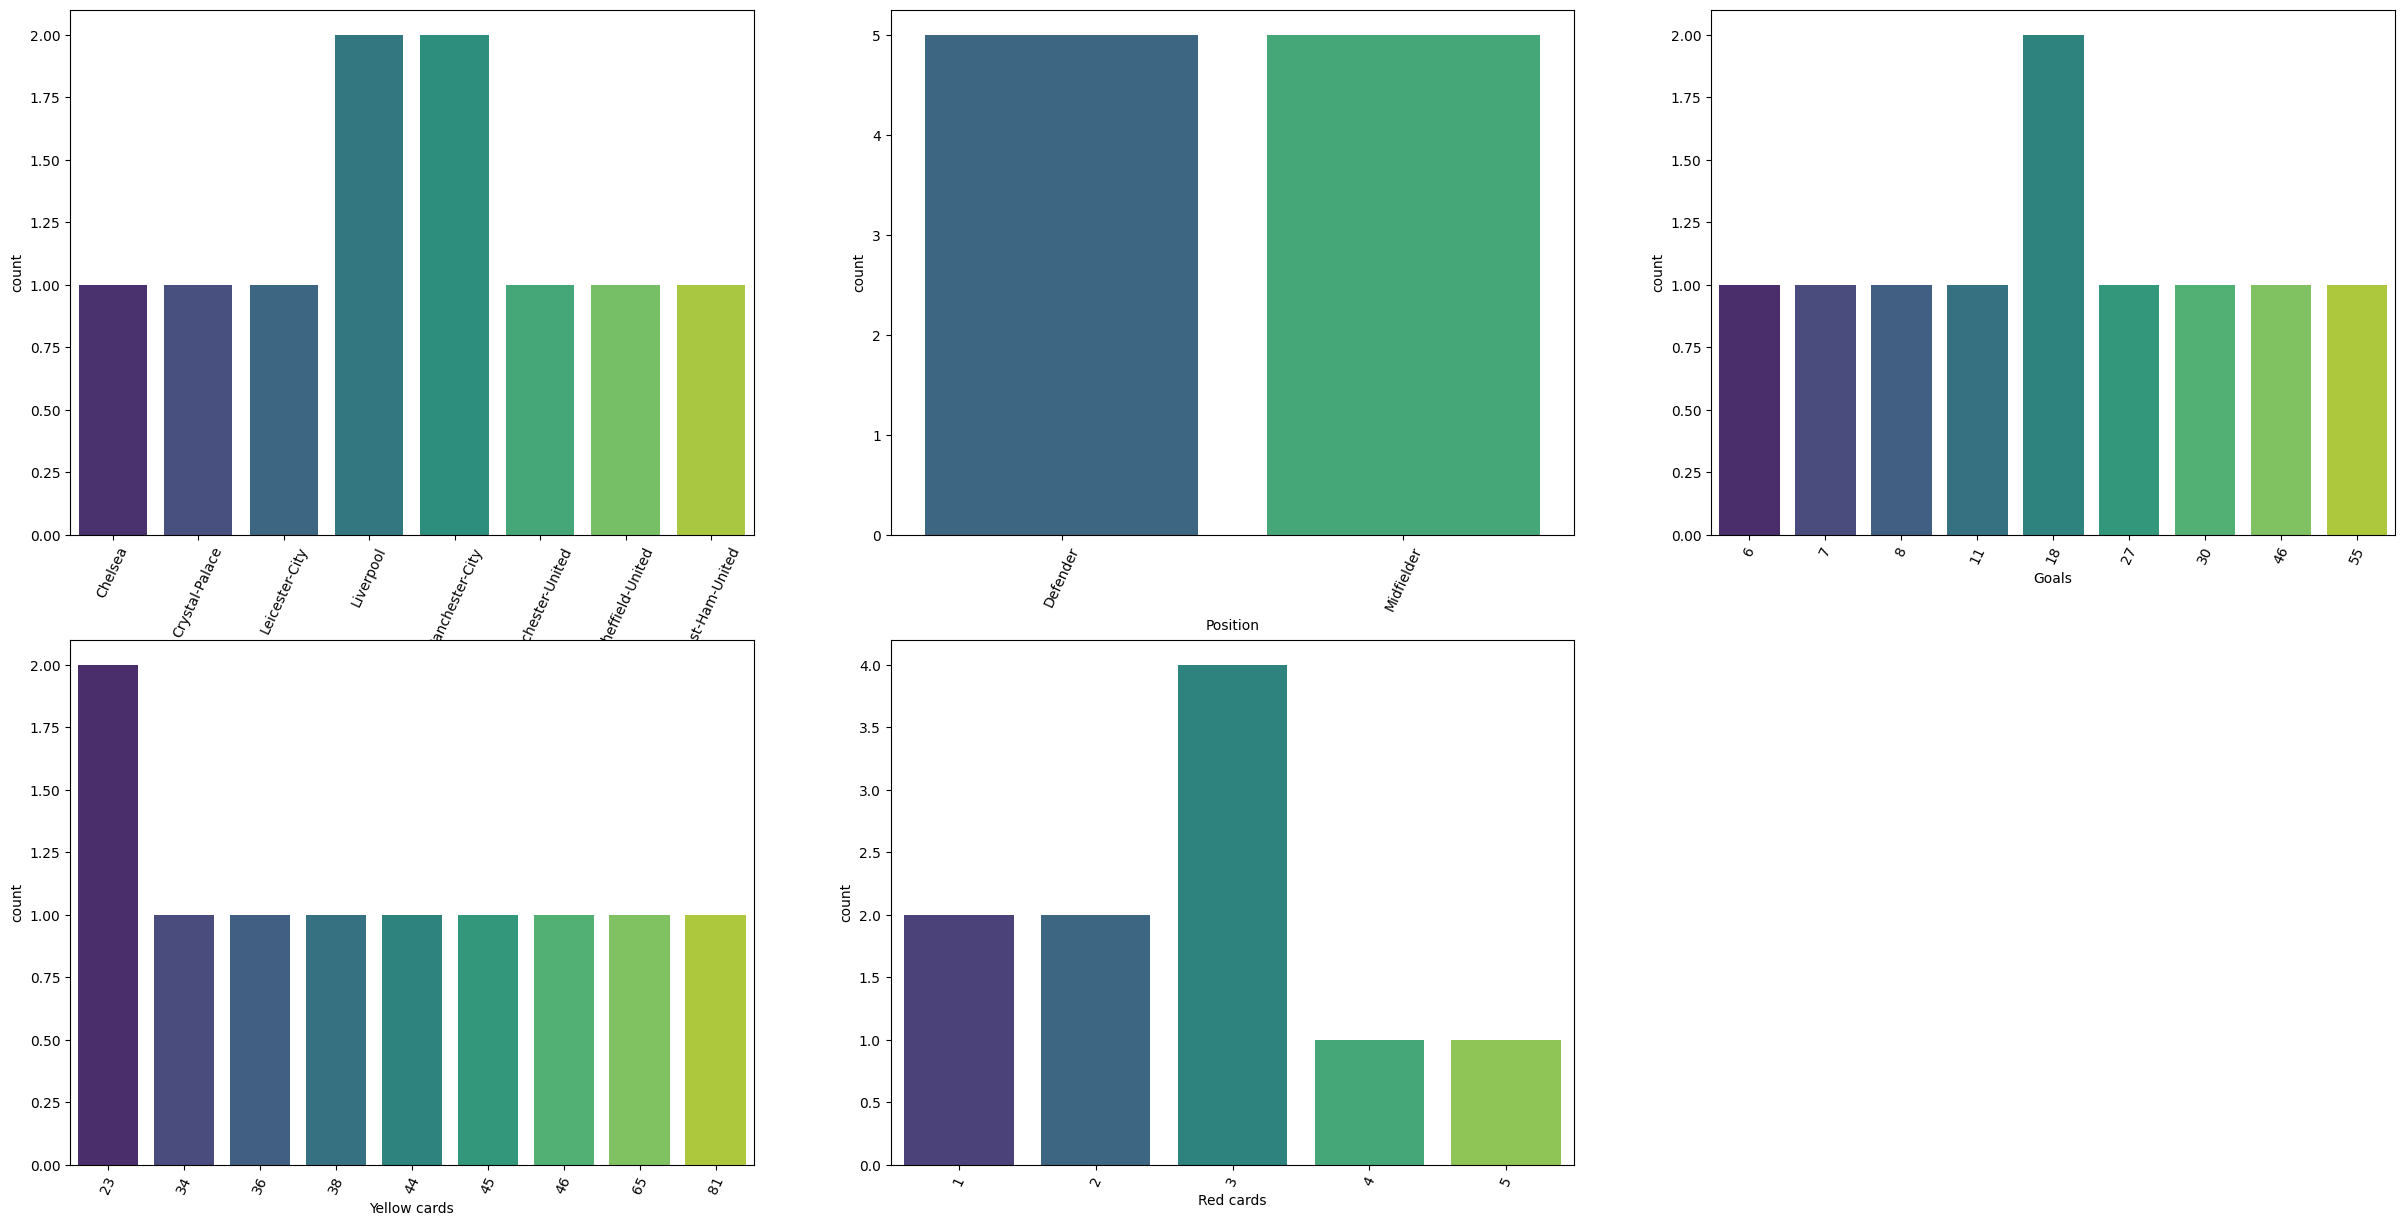

In [264]:
categories = df_modified[df_modified['kmeans labels'] == 1][[ 'Club','Position', 'Goals','Yellow cards','Red cards']]

plt.figure(figsize = (30, 15))
for i, col in enumerate(categories.columns, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x=categories[col], palette='viridis')
  plt.xticks(rotation = 65)

plt.show()

<Axes: >

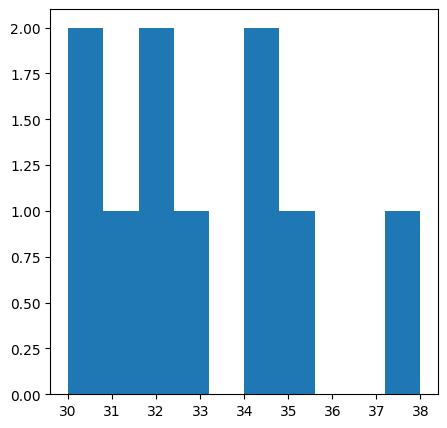

In [257]:
df_modified[df_modified['kmeans labels'] == 1]['Age'].hist(figsize=(5, 5), grid=False)

<ipython-input-266-a8fe002943e9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categories[col], palette='plasma')
<ipython-input-266-a8fe002943e9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categories[col], palette='plasma')
<ipython-input-266-a8fe002943e9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categories[col], palette='plasma')
<ipython-input-266-a8fe002943e9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `l

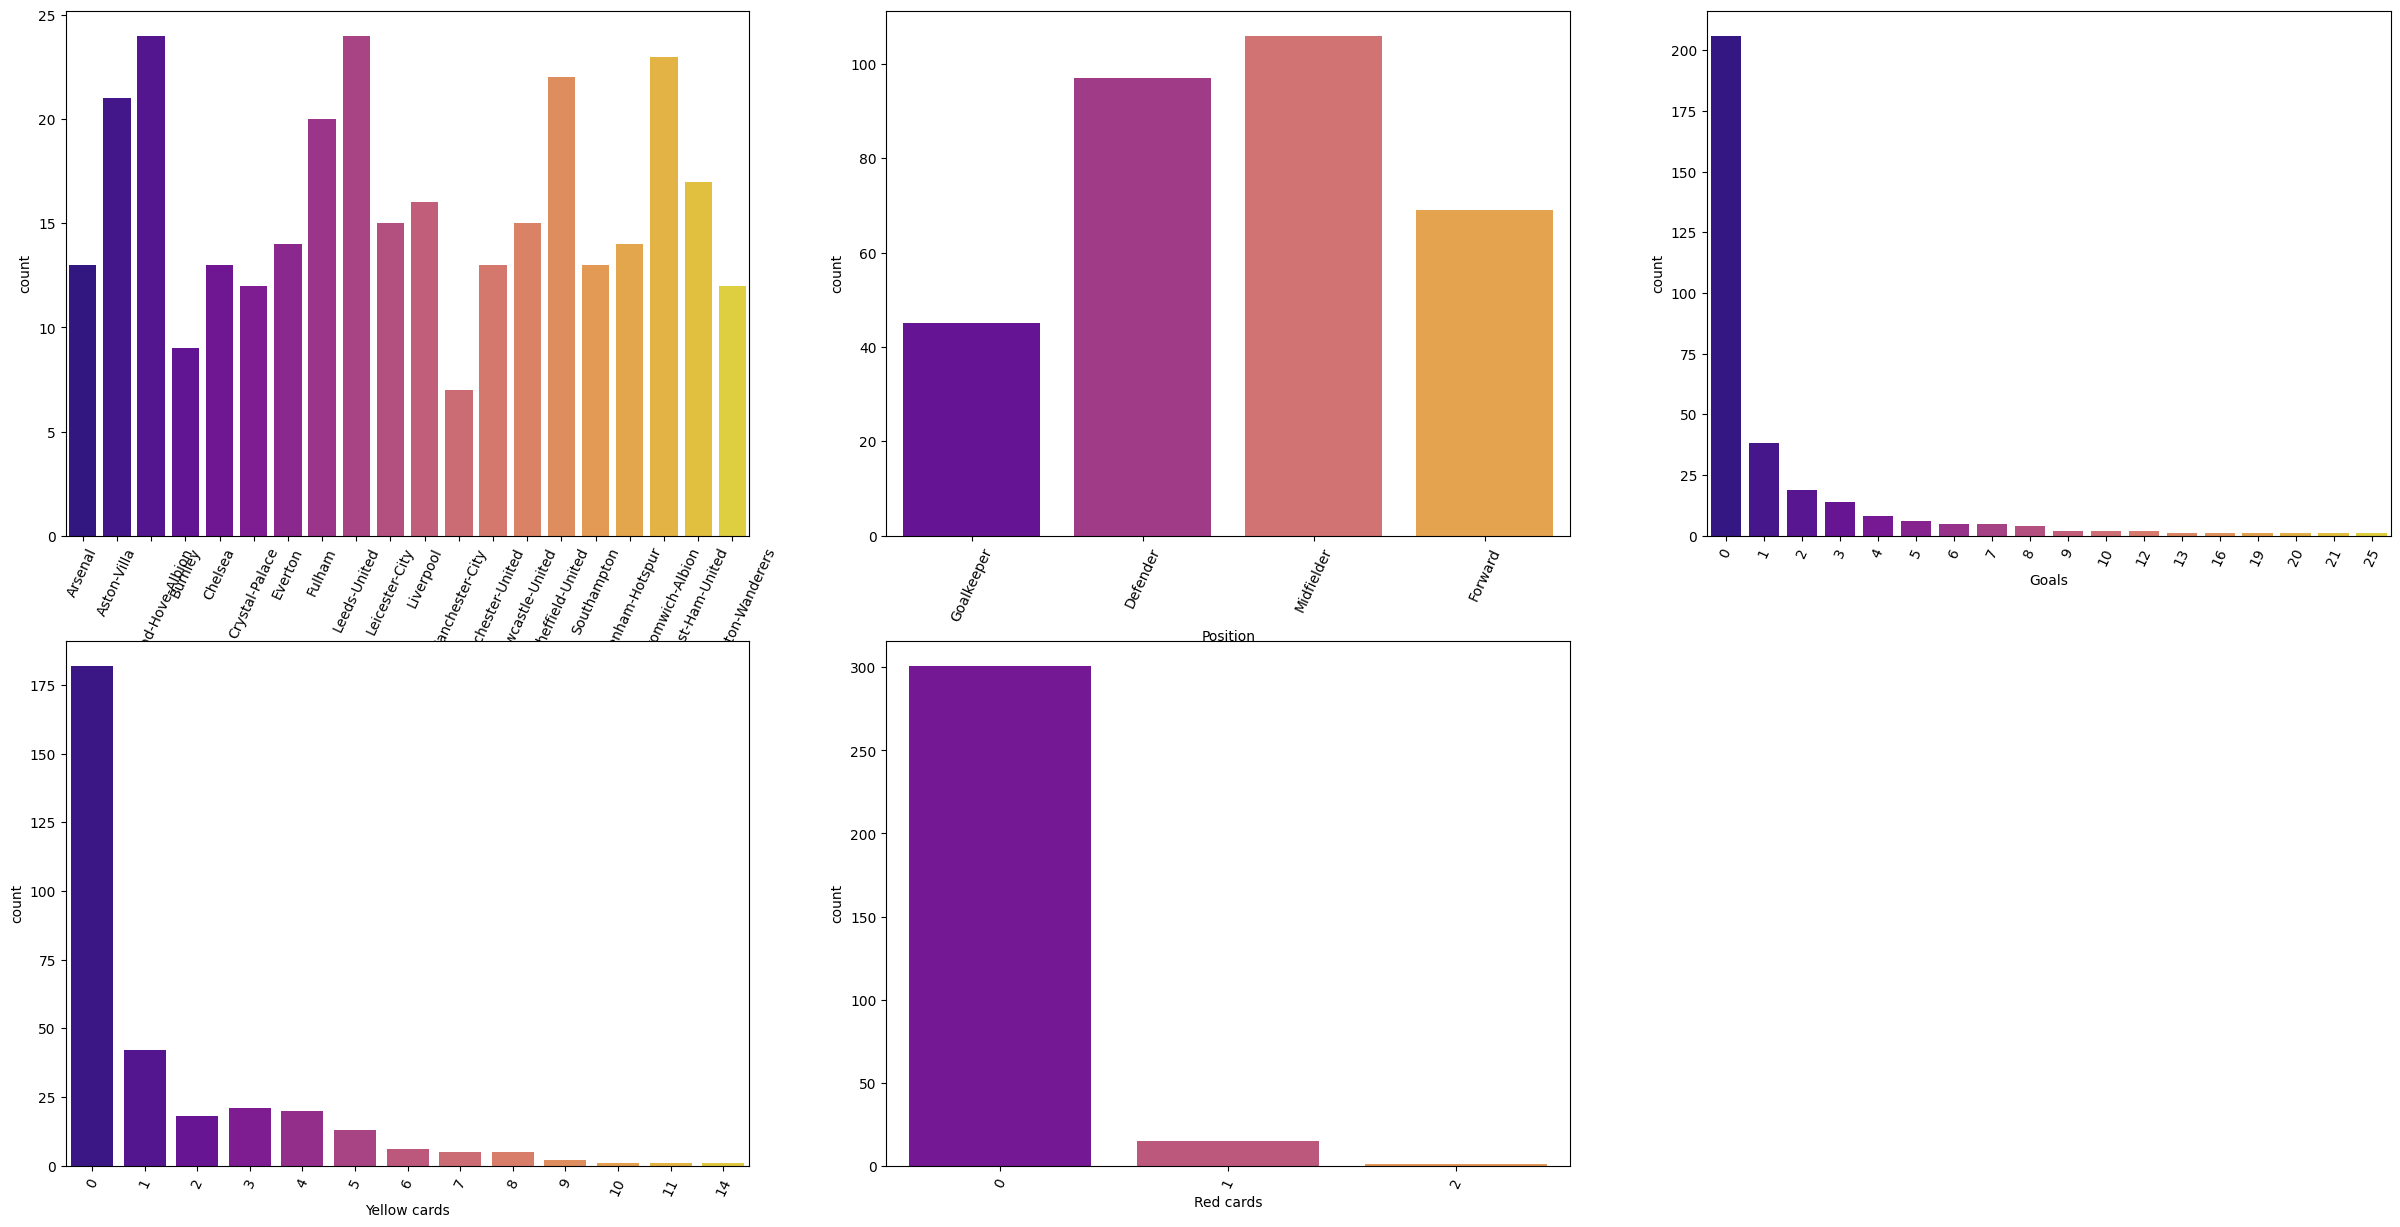

In [266]:
categories = df_modified[df_modified['kmeans labels'] == 2][[ 'Club','Position', 'Goals','Yellow cards','Red cards']]

plt.figure(figsize = (30, 15))
for i, col in enumerate(categories.columns, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x=categories[col], palette='plasma')
  plt.xticks(rotation = 65)

plt.show()

<Axes: >

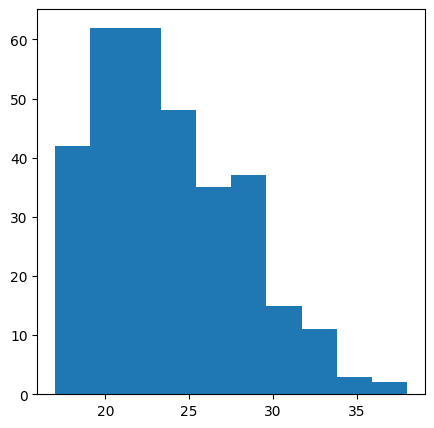

In [267]:
df_modified[df_modified['kmeans labels'] == 2]['Age'].hist(figsize=(5, 5), grid=False)

<ipython-input-268-ef68e942d72c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categories[col], palette='inferno')
<ipython-input-268-ef68e942d72c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categories[col], palette='inferno')
<ipython-input-268-ef68e942d72c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categories[col], palette='inferno')
<ipython-input-268-ef68e942d72c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set

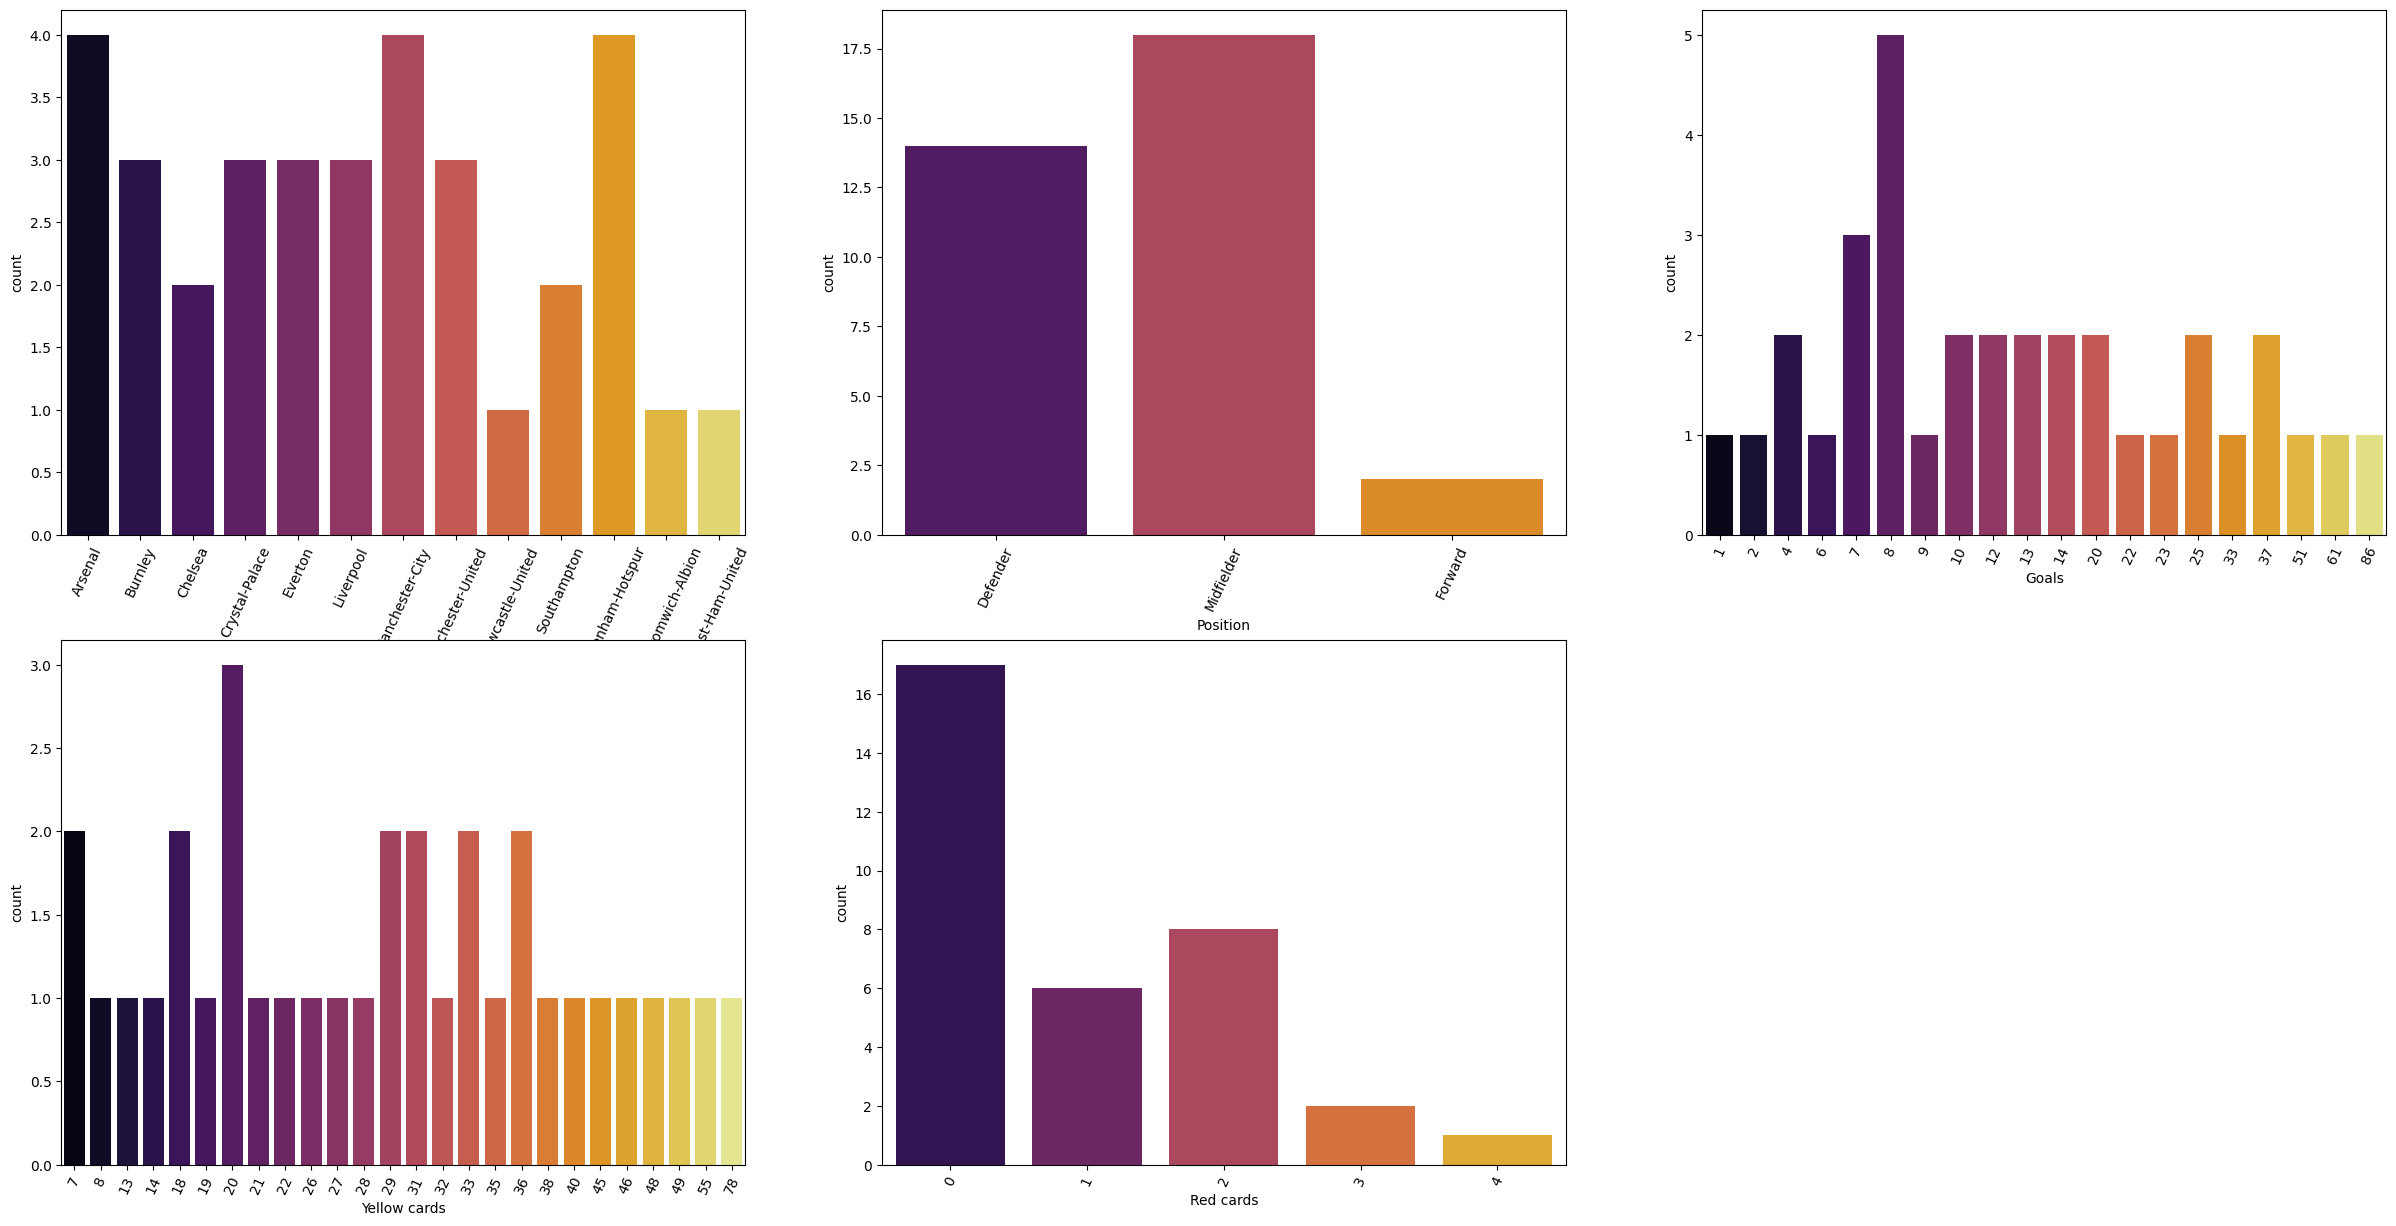

In [268]:
categories = df_modified[df_modified['kmeans labels'] == 3][[ 'Club','Position', 'Goals','Yellow cards','Red cards']]

plt.figure(figsize = (30, 15))
for i, col in enumerate(categories.columns, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x=categories[col], palette='inferno')
  plt.xticks(rotation = 65)

plt.show()

<Axes: >

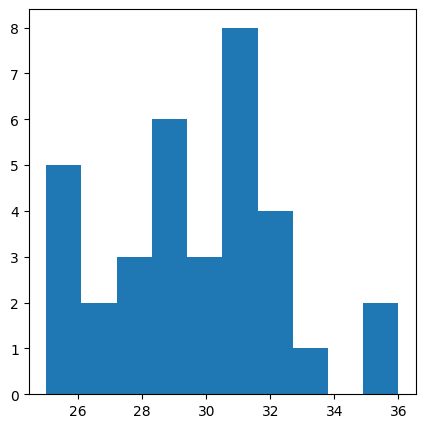

In [270]:
df_modified[df_modified['kmeans labels'] == 3]['Age'].hist(figsize=(5, 5), grid=False)

<ipython-input-271-bf9fcae8ff06>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categories[col], palette='magma')
<ipython-input-271-bf9fcae8ff06>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categories[col], palette='magma')
<ipython-input-271-bf9fcae8ff06>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categories[col], palette='magma')
<ipython-input-271-bf9fcae8ff06>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

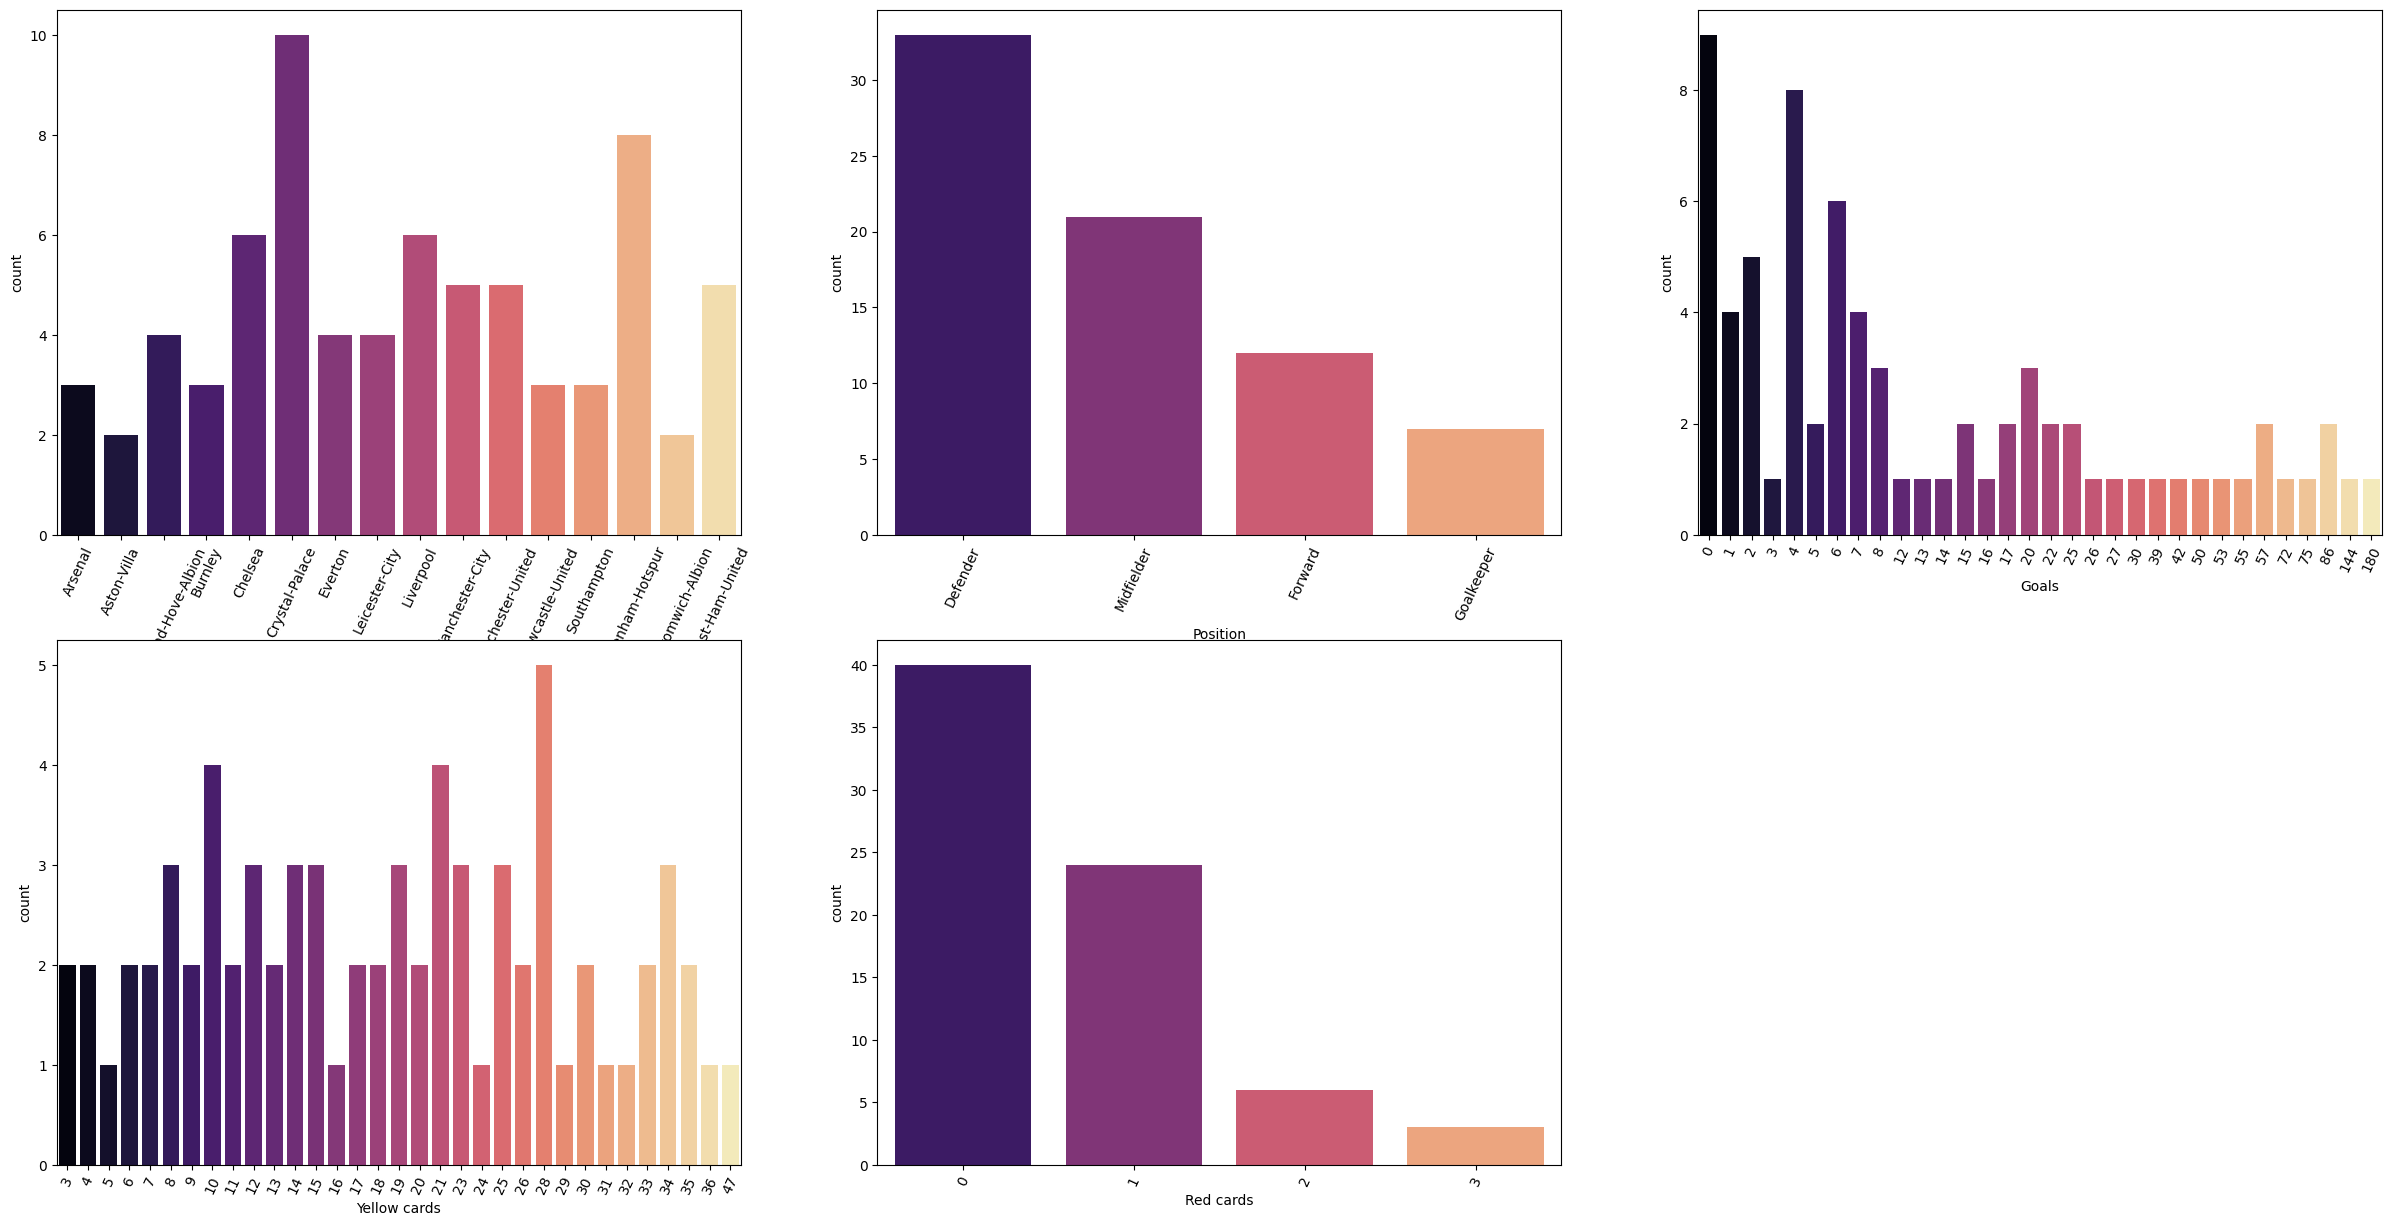

In [271]:
categories = df_modified[df_modified['kmeans labels'] == 4][[ 'Club','Position', 'Goals','Yellow cards','Red cards']]

plt.figure(figsize = (30, 15))
for i, col in enumerate(categories.columns, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x=categories[col], palette='magma')
  plt.xticks(rotation = 65)

plt.show()

<Axes: >

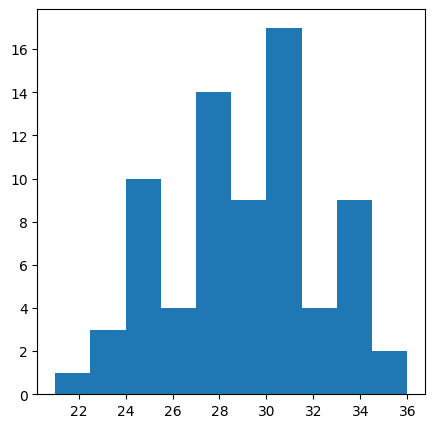

In [273]:
df_modified[df_modified['kmeans labels'] == 4]['Age'].hist(figsize=(5, 5), grid=False)

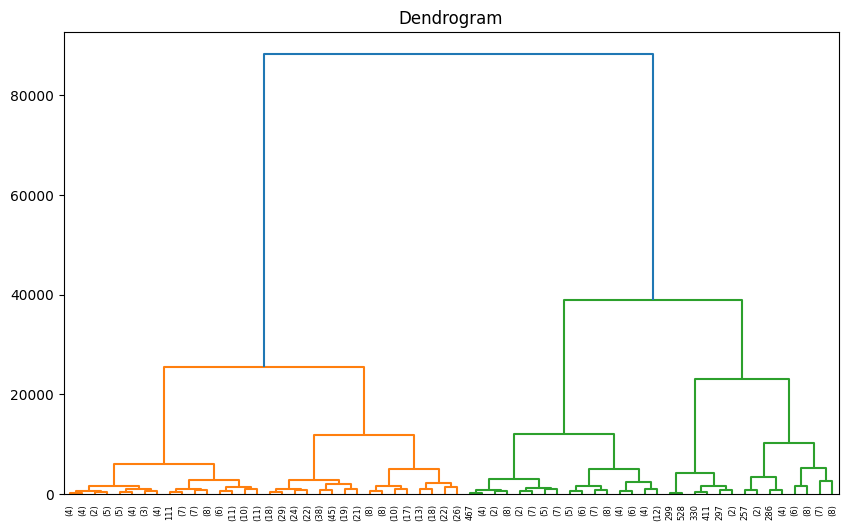

In [275]:
from scipy.cluster.hierarchy import dendrogram, linkage

aggl_cl = AgglomerativeClustering(n_clusters=5)
aggl_cl_labels = aggl_cl.fit_predict(X)

plt.figure(figsize=(10,6))
dendrogram(linkage(X, method='ward'), truncate_mode='level', p=5)
plt.title('Dendrogram')
plt.show()

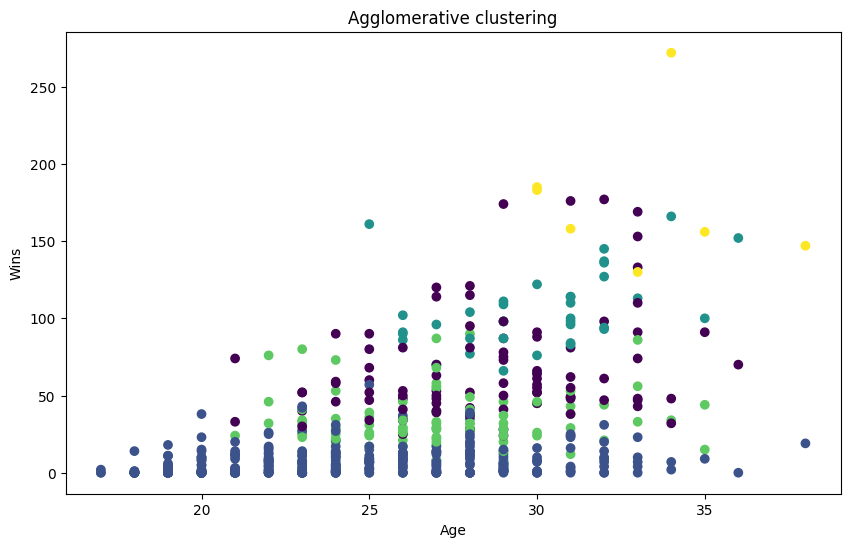

In [280]:
plt.figure(figsize=(10,6))
plt.scatter(df_modified.iloc[:, 5], df_modified.iloc[:, 7], c=aggl_cl_labels)
plt.title('Agglomerative clustering')
plt.xlabel('Age')
plt.ylabel('Wins')
plt.show()